In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pathlib import Path

In [ ]:
from scan_results import ScanResults

In [ ]:
scan = ScanResults(Path("analysed_data/8381_11Nov22_114759_11Nov22_121408"), fits=["SG", "DG"])

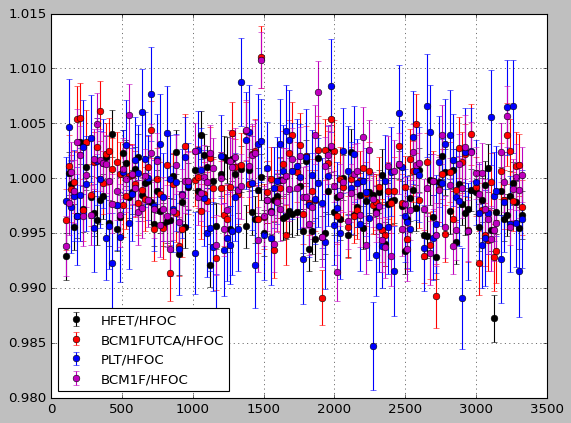

In [102]:
plt.style.use("classic")
plt.rcParams["legend.numpoints"] = 1
colors = ["k", "r", "b", "g", "m", "c", "y"]
for i, detector in enumerate(scan.detectors):
    if detector == "HFOC":
        continue

    data = scan.results["SG"].query(f"correction == 'Background' and detector == '{detector}'").set_index("BCID")
    ref = scan.results["SG"].query(f"correction == 'Background' and detector == 'HFOC'").set_index("BCID")

    value = data["CapSigma_X"] / ref["CapSigma_X"]
    error = value * np.sqrt(
        (data["CapSigmaErr_X"] / data["CapSigma_X"]) ** 2 +
        (ref["CapSigmaErr_X"] / ref["CapSigma_X"]) ** 2
    )

    plt.errorbar(data.index, value, yerr=error, fmt="o", label=f"{detector}/HFOC", color=colors[i])

plt.grid()
plt.legend(loc="best", fontsize=12)
plt.ticklabel_format(useOffset=False, axis="y")
plt.show()

In [103]:
correction = "Background_OrbitDriftSep_OrbitDriftRate_BeamBeam_DynamicBeta_ResidualOrbitDrift_LengthScale"
reference = "Background_OrbitDriftSep_OrbitDriftRate_BeamBeam_DynamicBeta"

data = scan.results["SG"].query(f"correction == '{correction}' and detector == 'HFET'").set_index("BCID")
ref = scan.results["SG"].query(f"correction == '{reference}' and detector == 'HFET'").set_index("BCID")

In [4]:
df1 = pd.DataFrame(
    {
        "BCID": [1, 2, 3, 4, 7, 9, 10],
        "Value": [1, 2, 3, 4, 5, 6, 7]
    }
).set_index("BCID")

df2 = pd.DataFrame(
    {
        "BCID": [2, 3, 4, 6, 7, 8],
        "Value": [1, 2, 3, 4, 5, 6]
    }
).set_index("BCID")

In [5]:
df1

,Value
BCID,
1,1
2,2
3,3
4,4
7,5
9,6
10,7


In [6]:
df2

,Value
BCID,
2,1
3,2
4,3
6,4
7,5
8,6


In [11]:
# Find common indexes
common_indexes = df1.index.intersection(df2.index)

# Filter DataFrames based on common indexes
df1_filtered = df1.loc[common_indexes]
df2_filtered = df2.loc[common_indexes]

# Now, df1_filtered and df2_filtered will have only the common indexes

print("DataFrame 1:")
print(df1_filtered)

print("\nDataFrame 2:")
print(df2_filtered)

DataFrame 1:
      Value
BCID       
2         2
3         3
4         4
7         5

DataFrame 2:
      Value
BCID       
2         1
3         2
4         3
7         5
